<a href="https://colab.research.google.com/github/Seanjie250/UCSB_CS190I/blob/main/linear_regression_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression with Python

In this machine problem (MP), you will implement a simple linear regression model in Python. You will create your own dataset and visualize the results using Matplotlib.



In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

def reset_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

**Task 1: Data Preparation**

Write a Python function named `generate_data` that takes the following parameters:

1.   `num_examples`: representing the number of data points to generate.
2.   `input_dim`: representing the dimensionality of data points to generate (without the bias dimension)

Inside the function:

1.   Specify the linear coefficient w and bias term (generate them randomly).
2.   Generate `num_examples` random values with dimension `input_dim`.
3.   Calculate the corresponding target variable `y`.
4.   (**opition**) Add random noise to `y` using a normal distribution with mean 0 and a pre-specified standard deviation.

Return:

1.   `data`: shape (num_examples, input_dim + 1), where the first dimension is the additional dimension and has value of 1.
2.   `y`: the target variable.

In [27]:
def generate_data(num_example, input_dim):
    """
    This function generates a dataset for linear regression.
    """
    data, gt_y = None, None
   # w = np.random.randn(input_dim)


    #bias = np.random.randn()
    #data = np.random.randn(num_example, input_dim)
    #add additional dimension with all value "1"
    #data = np.hstack((np.ones((num_example, 1)), data))


   # gt_y = np.dot(data, np.concatenate((np.array([bias]), w)))
    w = np.random.randn(input_dim+1 , 1)

    data = np.random.randn(num_example, input_dim+1)
    data[:,0] = 1
    gt_y = data @ w
    noise = np.random.randn(num_example,1)*0.01
    gt_y += noise


    return data, gt_y

**Task 2: Data Visualization**

Generate synthetic data using your `generate_data` function.
Create scatter plots to visualize the generated data points by setting input_dim to 1.


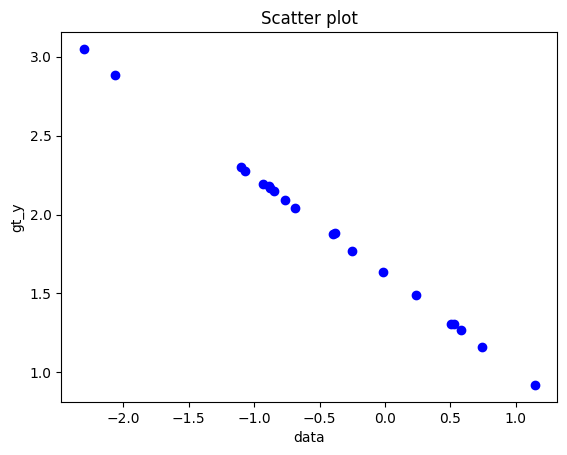

In [31]:
num_example = 20
input_dim = 1
reset_seed(1)

data, gt_y = generate_data(num_example, input_dim)

plt.scatter(data[:,1], gt_y, label='Data Points', color='blue', marker='o')
plt.xlabel('data')
plt.ylabel('gt_y')
plt.title('Scatter plot')
plt.show()

**Task 3: Data Splitting for Model Training**

Split the created dataset into a training set and a validation set. Please use the variable `train_perc` to control the proportion of data used for training. Splitting data into separate sets is crucial for evaluating machine learning models.

Inside the function:

1.   Calculate the number of samples to include in the training set and the validation set based on the `train_perc` parameter, which is a floating-point number between 0 and 1, indicating the proportion of data to be used for training. For example, if `train_perc` = 0.8, 80% of the data will be used for training, and the remaining 20% will be used for validation.

2.   Randomly shuffle the data to ensure that it's not sorted in any particular order.

3.   Split the data into training and validation sets according to the specified proportions.



In [32]:
# train test split
def train_test_split(data, gt_y, train_perc):
    """Split the dataset into training and validation set."""
    assert(train_perc > 0. and train_perc <= 1.)
    data_train, y_train, data_test, y_test = None, None, None, None

    num_examples = len(data)
    num_train_samples = int(train_perc * num_examples)

    # Randomly shuffle the data
    random_indices = np.random.permutation(num_examples)
    data = data[random_indices]
    gt_y = gt_y[random_indices]


    # Split data into training and validation sets
    data_train, y_train = data[:num_train_samples], gt_y[:num_train_samples]
    data_test, y_test = data[num_train_samples:], gt_y[num_train_samples:]



    return data_train, y_train, data_test, y_test

reset_seed(1)
train_perc = 0.3
data_train, y_train, data_test, y_test = train_test_split(data, gt_y, train_perc)
print(data_train.shape)

(6, 2)


**Task 4: Model Training - Analytically**

You need to implement a simple linear regression function to obtian optimal weight and bias using the analytical solution method. This method allows you to calculate the coefficients of the linear regression model directly without iterative optimization algorithms.

In [33]:
from re import T
from numpy.core.fromnumeric import transpose
def lin_reg_analyt(X, y):
    """
    Train linear regression analytical.
    Optimial solution:
    (X^T * X)^{-1} * X^T * y

    """
    X_transpose = np.transpose(X)
    XTX = np.dot(X_transpose, X)
    XTX_inverse = np.linalg.inv(XTX)
    XTX_inverse_XT = np.dot(XTX_inverse, X_transpose)
    W_optim = np.dot(XTX_inverse_XT, y)


    return W_optim

**Task 5: Train Your Model**

Now, you already have all the helper functions to train your linear regression model. Obtain the predicted parameters.

In [34]:
parameters = lin_reg_analyt(data_train, y_train)
print(parameters)

[[ 1.62123372]
 [-0.61861184]]


**Task 6: Model Evaluation**
Make predictions on the validation data using your trained model.  Calculate and display the Mean Squared Error (MSE) score to evaluate the model's performance.



In [36]:
y_test_pred = np.dot(data_test, parameters)


# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on validation set: {mse}")

MSE on validation set: 0.00010010972928213936


**Remark**

By now, you have finished the basic version of linear regression. With no additive noise in your data generation function, the MSE you achieve by using the analytical solution should be almost zero.

## Homework (Due on Sat Oct 21, 11:59pm PST)

**Problem 1: Basic Gradient Descent [30 points]**

Now, instead of using the analytic method to find the best parameters for the linear regression problem, you need to implement a gradient descent (GD) approach. Initialize your parameters with all zeros, set the number of iterations to 1000, and the learning rate to 1e-3. Report the MSE score and compare it to the one you found using the analytical approach.

In [37]:
def gd_linear_regression(X, y, num_step, lr):
    """Use gradient descent to find the optimal parameters"""
    # initialize parameters
    parameters = np.zeros((X.shape[1],1))
    for _ in range(num_step):

        y_pred = np.dot(X, parameters)

        # Compute errors
        error = y_pred - y

        # Compute gradients
        gradients_pre = np.dot(X.T, error)
        gradients = gradients_pre / num_example

        # Update parameters
        parameters -= lr*gradients

    return parameters

num_step = 1000
lr = 1e-7
parameters_gd = gd_linear_regression(data_train, y_train, num_step, lr)
print(parameters_gd)

[[ 5.48759856e-05]
 [-2.33477333e-05]]


Now evaluate the parameters you get by gradient descent on the validation set.

In [38]:

y_test_pred = np.dot(data_test, parameters_gd)


# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on validation set: {mse}")

MSE on validation set: 4.079935759371971


**Problem 2: Learning Rate in Gradient Descent [20 points]**

In this problem, you need to experiment with different learning rates. Please report the MSE score when you set your learning rate as 0.05 and 1e-7 (with the number of gradient descent steps remaining at 1000). Discuss your findings.

lr = 0.05 MSE = 6.538764657058062e-06

lr = 1e-7 MSE = 4.059845280642378



**Problem 3: Linear Regression with L2 Regularization [50 points]**

 Recall the objective function for linear regression can be expressed as $E(\mathbf{w})=\frac{1}{N}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|^2$. Minimizing this function with respect to $\mathbf{w}$ leads to the optimal $\mathbf{w}^*$ as $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.  However, this solution holds only when $\mathbf{X}^T\mathbf{X}$ is nonsingular.

To overcome this problem, the following objective
function is commonly minimized instead:
$E_2(\mathbf{w})=\|\mathbf{X}\mathbf{w}-\mathbf{y}\|^2+\alpha\|\mathbf{w}\|^2,$ where $\alpha>0$ is a user-specified parameter.  This objective function is often called ridge regression.  

Now, you need to repeat what you have done to obtain the optimal parameters of the ridge regression model using **both analytical** and **gradient descent** approaches.

Compare the MSE on the validation set for parameters obtained by four method: linear regression with analytical and gradient descent solution, and ridge regression with analytical and gradient descent solution (feel free to explore different values for $\alpha$).

Report your results in the following setting and discuss your findings:

*   Generate 1000 random data points with input dimension 100 (not including bias). Fix 100 of them as test points. Among the remaining 900 data points, use different number of data points (25, 50, 75, 100, ..., 300) as training data. Report MSE on the test set and plot the MSE as a function of the number of training data.



In [60]:
import random
import numpy as np
import matplotlib.pyplot as plt

def reset_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

In [61]:
def generate_data(num_example, input_dim):
    """
    This function generates a dataset for linear regression.
    """
    data, gt_y = None, None
    w = np.random.randn(input_dim+1 , 1)

    data = np.random.randn(num_example, input_dim+1)
    data[:,0] = 1
    gt_y = data @ w
    noise = np.random.randn(num_example,1)*0.01
    gt_y += noise


    return data, gt_y

In [63]:
num_example = 1000
input_dim = 100
reset_seed(1)

data, gt_y = generate_data(num_example, input_dim)

In [64]:
def train_test_split_2(data, gt_y):
    data_train, y_train, data_test, y_test = None, None, None, None
    num_examples = len(data)
    mask = np.arange(len(data)) % 25 == 0
    selected_data_points = data[mask]
    selected_y = gt_y [mask]
    # Randomly shuffle the data
    random_indices = np.random.permutation(num_examples)
    data = data[random_indices]
    gt_y = gt_y[random_indices]


    # Split data into training and validation sets

    data_train, y_train = selected_data_points, selected_y
    data_test, y_test = data[:100], gt_y[:100]



    return data_train, y_train, data_test, y_test

reset_seed(1)
train_perc = 0.3
data_train, y_train, data_test, y_test = train_test_split_2(data, gt_y)
print(data_train.shape)

(40, 101)


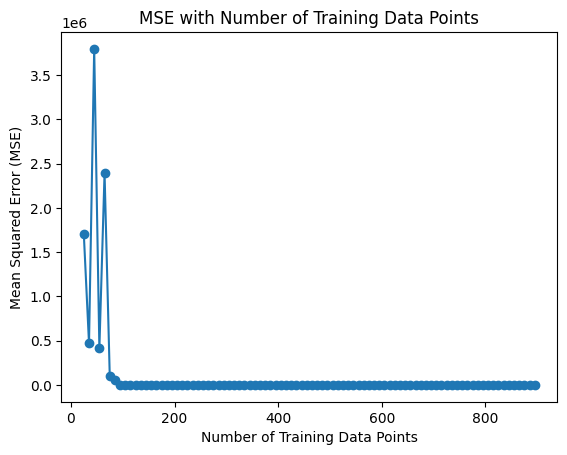

In [54]:
def ridge_regression_analyt(X, y, alpha):
    """Train ridge regression analytically."""
    # add 2 * alpha * w
    W_optim = None
    X_transpose = np.transpose(X)
    XTX = np.dot(X_transpose, X)
    XTX_inverse = np.linalg.inv(XTX)
    XTX_inverse_XT = np.dot(XTX_inverse, X_transpose)
    W_optim = np.dot(XTX_inverse_XT, y)
    W_optim = W_optim + 2 * alpha * np.dot(X_transpose ,y)
    return W_optim





mse_values = []
training_sizes = list(range(25, 900, 10))

for training_size in training_sizes:
    # Use the first `training_size` data points for training
    data_train = data[100:100+training_size]
    y_train = gt_y[100:100+training_size]
    parameters_L2 = ridge_regression_analyt(data_train, y_train,0.00005)
    y_test_pred = np.dot(data_test, parameters_L2)
    # Calculate MSE and store it
    mse = np.mean((y_test - y_test_pred) ** 2)
    mse_values.append(mse)

# Plot the MSE as a function of the number of training data
plt.plot(training_sizes, mse_values, marker='o')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE with Number of Training Data Points')
plt.show()



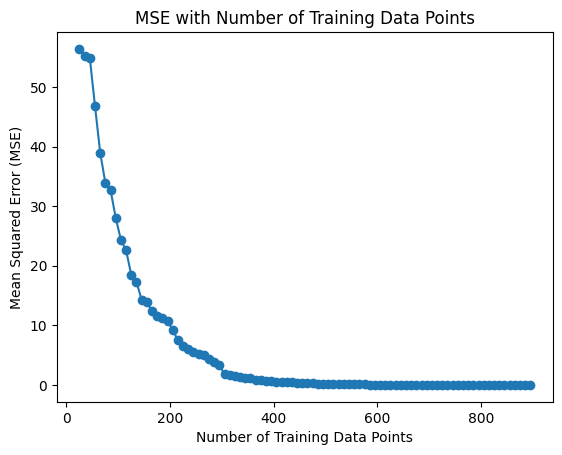

In [67]:
def gd_ridge_regression(X, y,  num_step, lr):
    """Use gradient descent to find the optimal parameters"""
    # initialize parameters
    parameters = np.zeros((X.shape[1],1))
    for _ in range(num_step):

        y_pred = np.dot(X, parameters)

        # Compute errors
        error = y_pred - y

        # Compute gradients
        gradients_pre = np.dot(X.T, error)
        gradients = gradients_pre / num_example

        # Update parameters
        parameters -= lr*gradients

    return parameters

num_step = 1000
lr = 1e-2

mse_values = []
training_sizes = list(range(25, 900, 10))

for training_size in training_sizes:
    # Use the first `training_size` data points for training
    data_train = data[100:100+training_size]
    y_train = gt_y[100:100+training_size]
    parameters_gd_ridge = gd_ridge_regression(data_train, y_train, num_step, lr)
    y_test_pred = np.dot(data_test, parameters_gd_ridge)
    # Calculate MSE and store it
    mse = np.mean((y_test - y_test_pred) ** 2)
    mse_values.append(mse)

# Plot the MSE as a function of the number of training data
plt.plot(training_sizes, mse_values, marker='o')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE with Number of Training Data Points')
plt.show()


